# Start of Analysis

## Create dataframe from experimental data collected 
(dialogue, narrator,asking direct politeness scenarios)

Define dictionary which takes in intensifier-predicate pair and returns the scenario for it

In [2]:
# read csv file
import pandas as pd
df = pd.read_csv("C:\\Users\\myuhk\\OneDrive\\ドキュメント\\MIT\\Fall2024\\jspsych_tutorial_960\\new_experiment.csv")
scenario_set = set()
for i in range(len(df)):
    scenario_set.add((df['scenario context'][i].split(df['intensifier'][i])[0].replace('\n','<br>'),df['predicate'][i]))

Make dataframe for dialogue scenario

In [3]:
import os
import json
import pandas as pd
def find_pair(data, scenario):
    first_slide = None
    second_slide = None
    for slide in data:
        if slide['trial_type'] == 'html-slider-response':
            if slide['stimulus'].find(scenario) != -1:
                if first_slide is None:
                    first_slide = slide
                else:
                    second_slide = slide
    print(scenario)
    if len(first_slide['stimulus'])<len(second_slide['stimulus']):
        first_slide,second_slide = second_slide,first_slide
        # split stimulus into words
    first = first_slide['stimulus'].split()
    second = second_slide['stimulus'].split()
    index = 0
    while first[index] == second[index]:
        index+=1
    inten = first[index]
    if inten == 'a':
        inten = 'a little'
    return (first_slide, second_slide,inten)

def make_new_pddf(path,country):
    data_frame = []
    for file in os.listdir(path):
        if file.endswith('.json'):
            with open(f"{path}\\"+file) as g:
                personid = file[8:-5]
                data = json.load(g)
                if len(data)<97:
                    # don't count
                    print(f"skipping {personid}")
                    continue
                    # print(len(data))
                for scenario in scenario_set:
                    pred = scenario[-1]
                    scenario = scenario[0]
                    slide_with, slide_without, inten= find_pair(data, scenario)
                    data_frame.append([personid,country,inten,pred,scenario,slide_with['response'],slide_with['rt'],"yes",slide_with['response']-slide_without['response']])
                    data_frame.append([personid,country,inten,pred,scenario,slide_without['response'],slide_without['rt'],"no",None])
    return pd.DataFrame(data_frame, columns = ['person_id', 'country', 'intensifier', 'predicate','scenario' ,'response', 'rt','has intensifier?', 'difference'])

In [4]:
new_UK_df = make_new_pddf("C:\\Users\\myuhk\\OneDrive\\ドキュメント\\MIT\\Fall2024\\jspsych_tutorial_960\\resultsAndAnalyses\\raw_results_additional_modifiers\\intensifier_UK","UK")
new_US_df = make_new_pddf("C:\\Users\\myuhk\\OneDrive\\ドキュメント\\MIT\\Fall2024\\jspsych_tutorial_960\\resultsAndAnalyses\\raw_results_additional_modifiers\\intensifier_US","US")

Sam apologizes to his coworker, Rachel, for missing a call during a meeting.<br>Sam: "I didn't see your call; I was in a meeting."<br>Rachel: "That's 
Megan has been searching for a gift for her grandmother, who recently moved into assisted living. After weeks of fruitless searching, a sales assistant helps Megan track down the perfect item - a vintage music box her grandmother had as a child.<br>Megan: "I can't thank you enough. I've been looking for something like this for so long. You've been 
Sophie's friend asks her to help with party preparations the night before the event.<br>Friend: "Can you stay late to help finish decorating for tomorrow?"<br>Sophie: "I've been running errands all day, and I'm 
Sophie and her friend, Mia, attend a classical music recital.<br>Mia: "The performance was so elegant. I loved how the orchestra played together."<br>Sophie: "I found it 
Jake attends a mandatory corporate training session.<br>Coworker: "I thought the trainer was engaging and kept it f

In [5]:
# add a column of intensifier score which is 0 if intensnfier is "a little" and 1 if it is anything else
score = {'impressive':0,'a little':-3,'fairly':-2,'rather':-0.5,'really':1,'deeply':1.5,'totally':2,'utterly':2}
new_UK_df['intensifier_score'] = new_UK_df['intensifier'].apply(lambda x: score[x])
new_US_df['intensifier_score'] = new_US_df['intensifier'].apply(lambda x: score[x])

In [6]:
# make new_df only have has intensifier? == yes
new_UK = new_UK_df[new_UK_df['has intensifier?'] == 'yes']
new_US = new_US_df[new_US_df['has intensifier?'] == 'yes']
# concatenate the two dataframes
new_countries = pd.concat([new_UK,new_US],keys = ['UK','US'])
new_countries = new_countries[new_countries['intensifier']!='impressive']


## Main visualizations

Text(0.5, 1.0, 'UK results Jan 15')

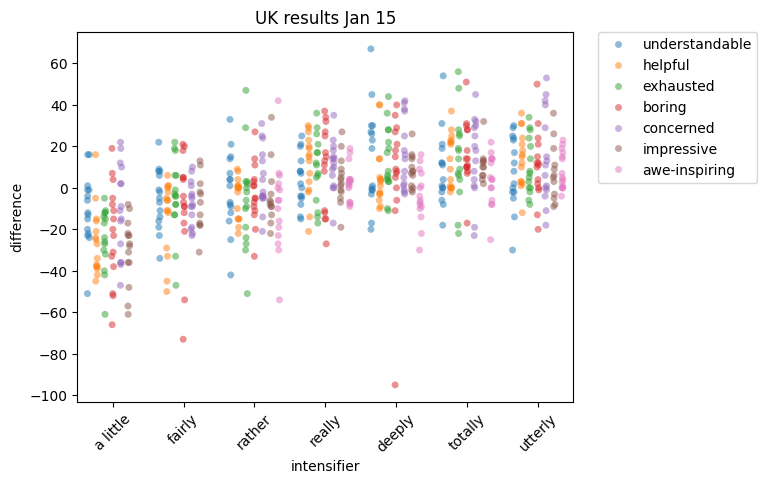

In [7]:
# scatter plot where x is intensifier and y is difference
import seaborn as sns
import matplotlib.pyplot as plt
def get_violin_plot(UK_df,US_df,hue = "country"):
    combined_df = pd.concat([UK_df,US_df])
    df = combined_df[combined_df['has intensifier?']=="yes"]
    df = df[df['intensifier']!='impressive']
    # sns.violinplot(data=df, x="intensifier", y="difference", hue=hue,
    #             split=True, inner="quart", fill=False)
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # plt.show()
    sns.violinplot(data=df, x="intensifier", y="difference", hue=hue,
                split=True, inner="quart", fill=False)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # rotate x labels
    plt.xticks(rotation=45)
    plt.show()
    # combined_df[(combined_df['predicate'] == "concerned") & (combined_df['intensifier'] == "very")]
    # combined_df[(combined_df['predicate'] == "impressive") & (combined_df['intensifier'] == "kind of")] # I forgot to put kind of here
    # plot stripplot with legend outside graph
    sns.stripplot(data=df, x="intensifier", y="difference", hue=hue, dodge=True, alpha=.5, zorder=1)
    plt.xticks(rotation=45)
    # # plot legend outside graph
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # plt.show()
    # sns.stripplot(data=df, x="predicate", y="Z-Score Difference", hue=hue, dodge=True, alpha=.25, zorder=1)
    # # plot legend outside graph
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # # make width between different hue closer
    # plt.show()
# add column 'country' to new_UK and new_US
# new_UK['country'] = 'UK'
# new_US['country'] = 'US'
# get_violin_plot(new_UK,new_US, "country")

sns.stripplot(data=new_UK, x="intensifier", y="difference", hue='predicate', dodge=True, alpha=.5, order =  ['a little','fairly','rather','really','deeply','totally','utterly'])
# move legend outside graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)
# title is UK results Jan 15
plt.title("UK results Jan 15")

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'a little'),
  Text(1, 0, 'fairly'),
  Text(2, 0, 'rather'),
  Text(3, 0, 'really'),
  Text(4, 0, 'deeply'),
  Text(5, 0, 'totally'),
  Text(6, 0, 'utterly')])

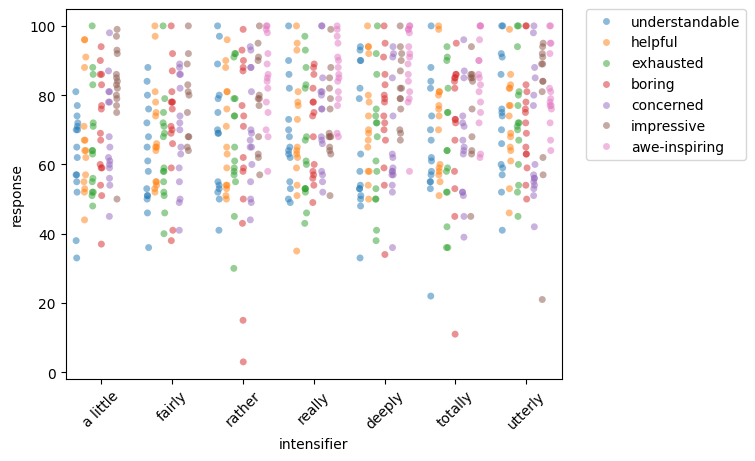

In [8]:

sns.stripplot(data=new_UK_df[new_UK_df['has intensifier?']=='no'], x="intensifier", y="response", hue='predicate', dodge=True, alpha=.5, order =  ['a little','fairly','rather','really','deeply','totally','utterly'])
# move legend outside graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

In [9]:
# sns.FacetGrid(new_US_df, col="person_id", col_wrap=4).map(sns.histplot, "response")

# filter data
def elim_outliers(df):
    # dropped Unnamed: 0 column
    filtered_df = df.loc[(df['response'] > 95) | (df['response'] < 5)]
    for id in df['person_id'].unique():
        if len(filtered_df[filtered_df['person_id'] == id])/len(df[df['person_id'] == id])>0.8:
            df.drop(df[df['person_id'] == id].index, inplace=True)
    df['predicate Z-score'] = df.groupby(['person_id','predicate'])['response'].transform(lambda x: (x - x.mean()) / x.std())
    # if has_intensifier = no then change 'intensifier' to 'none'
    df.loc[df['has intensifier?'] == 'no', 'intensifier'] = 'none'
    return df
new_UK_df = elim_outliers(new_UK_df)
new_US_df = elim_outliers(new_US_df)


                 response
predicate                
awe-inspiring   17.727797
boring          21.590593
concerned       19.719744
exhausted       19.532238
helpful         19.834850
impressive      18.086756
understandable  20.595991
                 response
predicate                
awe-inspiring   11.540731
boring          18.533224
concerned       15.950082
exhausted       17.043453
helpful         15.425290
impressive      13.958656
understandable  16.929378


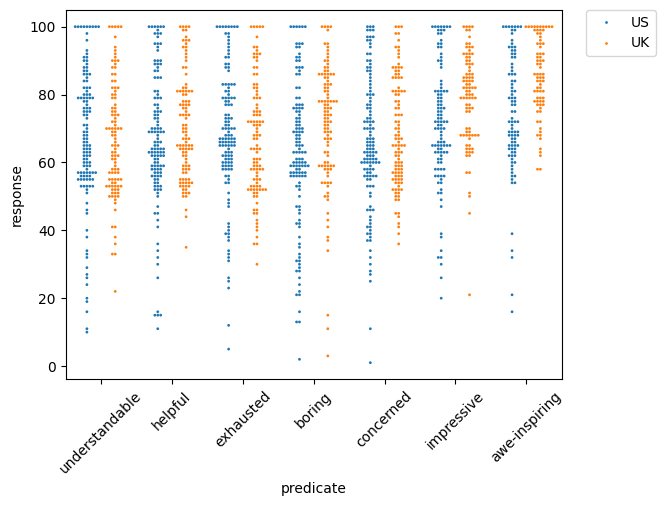

In [10]:

# add column 'country'
new_UK_df['country'] = 'UK'
new_US_df['country'] = 'US'
sns.swarmplot(data=pd.concat([new_US_df[new_US_df['has intensifier?']=='no'],new_UK_df[new_UK_df['has intensifier?']=='no']]), x="predicate", y="response",hue='country', dodge=True,size=2)
# move legend outside graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)
# check means for each predicate for new_US_df and new_UK_df
# plot means for each predicate for new_US_df and new_UK_df
# sns.barplot(data=pd.concat([new_US_df[new_US_df['has intensifier?']=='no'],new_UK_df[new_UK_df['has intensifier?']=='no']]), x="predicate", y="response",hue='country')

print(new_US_df[new_US_df['has intensifier?']=='no'].groupby('predicate').agg({'response': 'std'}))
print(new_UK_df[new_UK_df['has intensifier?']=='no'].groupby('predicate').agg({'response': 'std'}))
# # print means for US and UK for each predicate
# print(pd.concat(new_US_df[new_US_df['has intensifier?']=='no']).groupby('predicate').agg({'response': 'mean'}))

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'a little'),
  Text(1, 0, 'fairly'),
  Text(2, 0, 'rather'),
  Text(3, 0, 'really'),
  Text(4, 0, 'deeply'),
  Text(5, 0, 'totally'),
  Text(6, 0, 'utterly')])

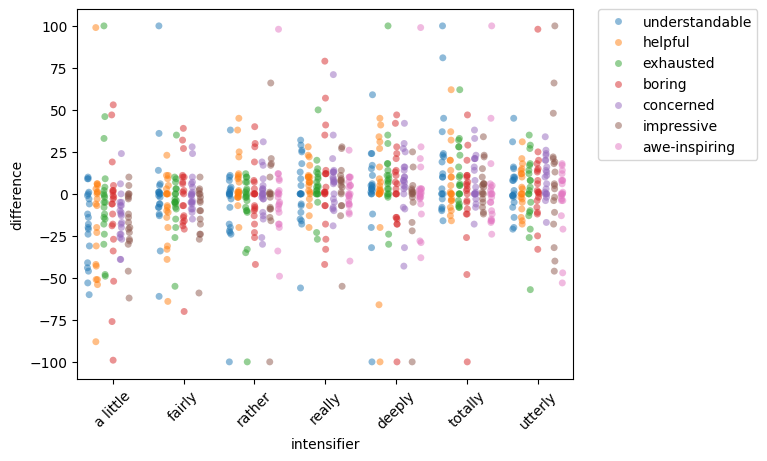

In [11]:
sns.stripplot(data=new_US, x="intensifier", y="difference", hue='predicate', dodge=True, alpha=.5, order =  ['a little','fairly','rather','really','deeply','totally','utterly'])
# move legend outside graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

In [14]:
# group by intensifier, predicate and obtain mean and std of difference
# new_UK.groupby(['intensifier','predicate'])
new_UK = new_UK_df.groupby(['intensifier','predicate']).agg({'difference':['mean','sem']})
new_US = new_US_df.groupby(['intensifier','predicate']).agg({'difference':['mean','sem']})
# count unique person_id for new_UK_df and new_US_df
# change df so new_UK does not have multiindex
# new_UK = new_UK.reset_index()
# # # remove index column
# # new_UK = new_UK.groupby(['intensifier']).agg({'difference':['mean','sem']})
# new_US = new_US.reset_index()
# new_US = new_US.groupby(['intensifier']).agg({'difference':['mean','sem']})

[('a little', 'boring'), ('a little', 'concerned'), ('a little', 'exhausted'), ('a little', 'helpful'), ('a little', 'impressive'), ('a little', 'understandable'), ('deeply', 'awe-inspiring'), ('deeply', 'boring'), ('deeply', 'concerned'), ('deeply', 'exhausted'), ('deeply', 'helpful'), ('deeply', 'impressive'), ('deeply', 'understandable'), ('fairly', 'boring'), ('fairly', 'concerned'), ('fairly', 'exhausted'), ('fairly', 'helpful'), ('fairly', 'impressive'), ('fairly', 'understandable'), ('none', 'awe-inspiring'), ('none', 'boring'), ('none', 'concerned'), ('none', 'exhausted'), ('none', 'helpful'), ('none', 'impressive'), ('none', 'understandable'), ('rather', 'awe-inspiring'), ('rather', 'boring'), ('rather', 'concerned'), ('rather', 'exhausted'), ('rather', 'helpful'), ('rather', 'impressive'), ('rather', 'understandable'), ('really', 'awe-inspiring'), ('really', 'boring'), ('really', 'concerned'), ('really', 'exhausted'), ('really', 'helpful'), ('really', 'impressive'), ('really'

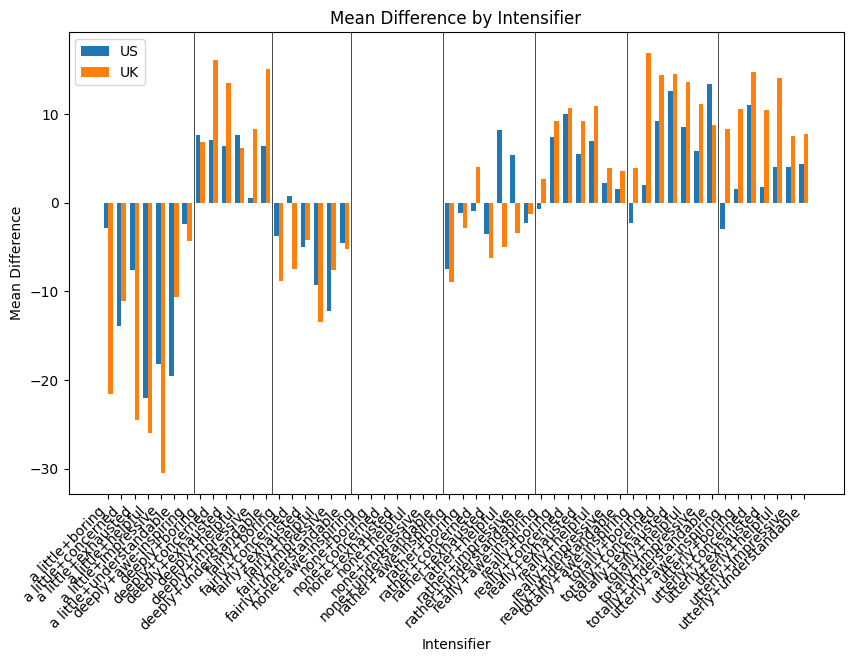

In [15]:
# plot values next to eachother of each of values in new_US[('difference','mean')].keys()
# so x lables are new_US[('difference','mean')].keys() which are predicate intensifier pairs
# y values are new_US[('difference','mean')].values() and new_UK[('difference','mean')].values()
import matplotlib.pyplot as plt
import numpy as np

keys = list(new_US[('difference','mean')].keys())  # Assuming both have the same keys
# delete entry ("impressive","impressive") from keys
keys.remove(('impressive','impressive'))
print(keys)
us_means = [new_US[('difference','mean')][k] for k in keys]
uk_means = [new_UK[('difference','mean')][k] for k in keys]
uk_std = [new_UK[('difference','sem')][k] for k in keys]
us_std = [new_US[('difference','sem')][k] for k in keys]
# uk_inten_val = [new_UK[('intensifier_score','sum')][k] for k in keys]
# us_inten_val = [new_US[('intensifier_score','sum')][k] for k in keys]

# Plotting
# convert range(48) to np array
x = np.array(range(54))  # X positions for bars
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars_us = ax.bar(x - width/2, us_means, width, label='US')
bars_uk = ax.bar(x + width/2, uk_means, width, label='UK')
# Add error bars
# ax.errorbar(x - width/2, us_means, us_std, fmt='none', ecolor='black', capsize=2)
# ax.errorbar(x + width/2, uk_means, uk_std, fmt='none', ecolor='black', capsize=2)
# remove the numbers on bar

# Add labels, title, and legend
ax.set_xlabel('Intensifier')
ax.set_ylabel('Mean Difference')
ax.set_title('Mean Difference by Intensifier')
ax.set_xticks(x)
ax.set_xticklabels([f'{k[0]}+{k[1]}' for k in keys], rotation=45, ha='right')

# draw line after each predicate
for i in [7,13,19,26,33,40,47]:
    ax.axvline(x=i-0.5, color='black', linewidth=0.5)
ax.legend()
# add values to each bar
# for i in range(len(us_means)):
#     ax.text(x[i] - width/2, us_means[i], f'{us_inten_val[i]:.0f}', ha='center', va='bottom')
#     ax.text(x[i] + width/2, uk_means[i], f'{uk_inten_val[i]:.0f}', ha='center', va='bottom')
# Show plot
plt.show()
